## Peso al nacer

Leer el dataset que se encuentra en data/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
¿Sigue una distribución gaussiana?

In [2]:
bwt<-read.csv("data/birthweight_reduced.csv")
weight<-bwt$Birthweight

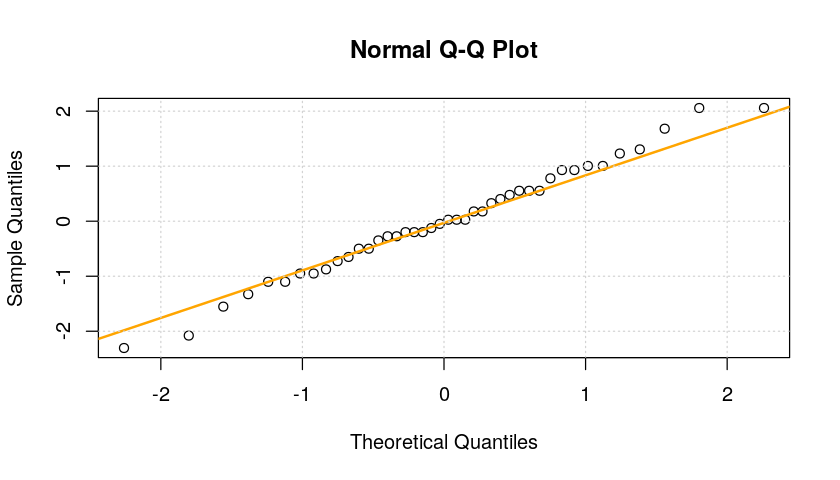

In [3]:
options(repr.plot.height=4,repr.plot.width=7)

qqnorm((weight-mean(weight))/sd(weight))
qqline((weight-mean(weight))/sd(weight), col = 'orange', lwd =2)
grid()

In [4]:
str(bwt)

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

In [10]:
bwt$LowBirthWeight[grep("^L",bwt$LowBirthWeight)]

[1] Low Low Low Low Low Low
Levels: Low Normal

## La paradoja del Autobús

Un autobus tiene una frecuencia de 1 autobús cada 10 minutos. 
¿Cuanto tiempo de media tengo que esperar para ver pasar un autobús por la parada? 
¿Y para ver 2 autobuses pasar por la parada?  
¿Cual es la probabilidad de que el autobús llegue antes de que pase 5 minutos esperando?

### Hipótesis 1: 

El autobús tiene un horario fijo y preciso. Cada autobús sale cada 10 minutos exactamente. Podemos asumir que no hay atasco y los autobuses cumplen el horario previsto.

Llegamos a la parada en un tiempo aleatorio. El autobús puede llegar en cualquier momento que siga una distribución en 0 y 10 minutos.

La media de espera de un autobús es: $\mu=\frac{b-a}{2}-\frac{10-0}{2}=5$ minutos

La media de espera para ver dos autobuses es: 5+10=15 minutos

La probabilidad de que el autobús llegue antes de que pase 5 minutos esperando es:
\\[
P(X<5)=\int_0^5 \frac{1}{10} dx = 0.5
\\]

### Hipótesis 2: 

El autobús tiene un horario fijo y preciso. Cada autobús sale cada 10 minutos exactamente. Pero el tráfico no es fluido, hay mucha gente subiendo y bajando del autobús continuamente y nos encontramos en una parada lejana de la cabecera.

Llegamos a la parada en un tiempo aleatorio. Podemos asumir que el hecho de que aparezca un autobús en la parada es independiente de cuando fue la última vez que pasó un autobús. Los autobuses aparecen en la parada siguiendo una distribución de Poisson y el tiempo de espera se modela con una distribución exponencial. Se producirá un evento (aparecerá un bus) con una media de $\lambda=1/10$ cada minuto.

La media de espera para ver un autobús sería $1/\lambda=10$ minutos

La media de espera para ver dos autobuses sería 20 minutos


La probabilidad de que el autobús llegue antes de que pase 5 minutos esperando es:
\\[
P(X<5)=\int_0^5 \frac{1}{10}·e^{\frac{-1}{10}} dx =-e^{-\frac{1}{10}} \Big|_0^5 = -e^{\frac{-5}{10}}+e^0=0.3934
\\]

# Origen de la vida

Datos basados en:
* [Life Before Earth](https://arxiv.org/pdf/1304.3381.pdf)
* [Genome increase as a clock for the origin and evolution of life](https://biologydirect.biomedcentral.com/track/pdf/10.1186/1745-6150-1-17?site=biologydirect.biomedcentral.com)


La siguiente tabla muestra la complejidad de ADN, eliminando las redundancias, de diferentes grupos de animales y su aparición en la tierra:

| especies | genoma completo | genoma sin redundancia | aparición |
| - | - | - | - |
| mamíferos | $3.2 · 10^9$pb | $4.8 · 10^8$pb | 125 ma |
| peces     | $4.8 · 10^8$pb | $1.6 · 10^8$pb | 500 ma |
| gusanos   | $9.7 · 10^7$pb | $7.2 · 10^7$pb | 1000ma |
| eucariotas| $2.9 · 10^6$pb | $2.9 · 10^6$pb | 2100ma |
| procariotas|$5 · 10^5$pb   | $5 · 10^5$pb   | 3500ma |


Las columnas significan:
* especies: especies de animales.
* genoma completo: Longitud del genoma de una especie medido en pares de bases de ADN.
* genoma completo: Longitud del genoma de una especie, eliminando la redundancia, medido en pares de bases de ADN.
* aparición: Cuando ese conjunto de especies aparecieron.

Con estos datos tratar de obtener una regresión que indique cuando apareció un organismo con solo 1 par de bases genéticas. Esto podría marcar el origen de la vida.

¿Qué columna habría que coger para hacer la regresión la del genoma completo o el que elimina la redundancia?

Ayuda: Es mejor usar escalas logarítmicas.

In [11]:
df<-data.frame(especie=c("mamíferos","peces","gusanos","eucariotas","procariotas"),
           gen_total=c(3.2e9,4.8e8,9.7e7,2.9e6,5e5),
          gen_reduc=c(4.8e8,1.6e8,7.2e7,2.9e6,5e5),
          aparicion=c(-125,-500,-1000,-2100,-3550))

In [12]:
df

especie,gen_total,gen_reduc,aparicion
<fct>,<dbl>,<dbl>,<dbl>
mamíferos,3.2e+09,4.8e+08,-125
peces,4.8e+08,1.6e+08,-500
gusanos,9.7e+07,7.2e+07,-1000
eucariotas,2.9e+06,2.9e+06,-2100
procariotas,5.0e+05,5.0e+05,-3550


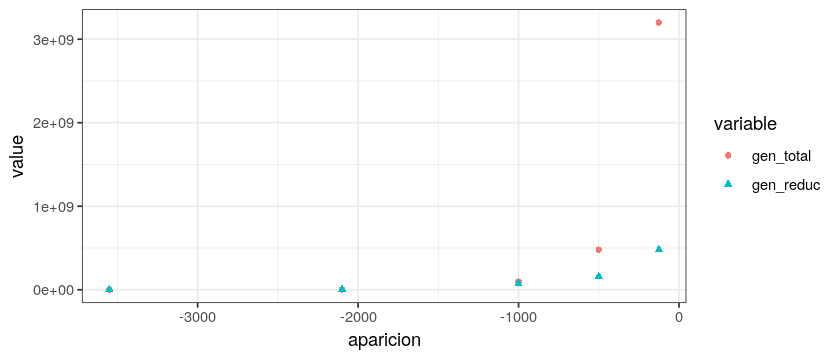

In [15]:
library(ggplot2)
library(reshape2)

options(repr.plot.height=3,repr.plot.width=7)
dfm<-melt(df,id=c("especie","aparicion"))
#dfm
ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

especie,gen_total,gen_reduc,aparicion
<fct>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


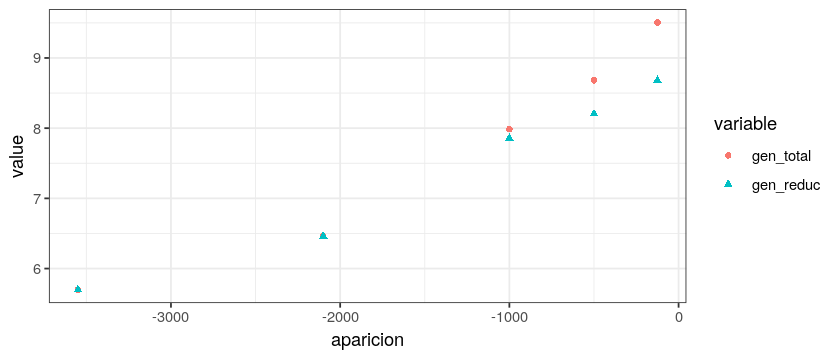

In [21]:
dflog<-df
dflog[,2:3] <- log10(dflog[,2:3])
dflog
dfm<-melt(dflog,id=c("especie","aparicion"))
#dfm
ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

In [22]:
model_total <- lm(data=dflog, formula= gen_total ~ aparicion)
summary(model_total)


Call:
lm(formula = gen_total ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.37584 -0.03573 -0.18043 -0.49530  0.33562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.266749   0.290574  31.891 6.78e-05 ***
aparicion   0.001099   0.000152   7.235  0.00545 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4215 on 3 degrees of freedom
Multiple R-squared:  0.9458,	Adjusted R-squared:  0.9277 
F-statistic: 52.35 on 1 and 3 DF,  p-value: 0.005446


In [23]:
model_reduc <- lm(data=dflog, formula= gen_reduc ~ aparicion)
summary(model_reduc)


Call:
lm(formula = gen_reduc ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.11643 -0.02685  0.07147 -0.34422  0.18317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.676e+00  1.648e-01   52.65 1.51e-05 ***
aparicion   8.902e-04  8.618e-05   10.33  0.00194 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.239 on 3 degrees of freedom
Multiple R-squared:  0.9727,	Adjusted R-squared:  0.9635 
F-statistic: 106.7 on 1 and 3 DF,  p-value: 0.001936


In [25]:
#y = coef[1]+x*coef[2]
model_reduc$coef[1]
model_reduc$coef[2]
model_reduc$coef

(Intercept) 
   8.676086

aparicion 
0.0008902227

(Intercept)    aparicion 
8.6760862996 0.0008902227

In [29]:
dflog

especie,gen_total,gen_reduc,aparicion
<fct>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


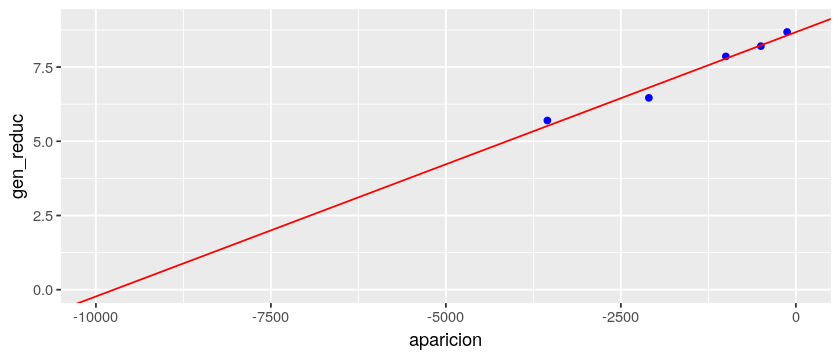

In [28]:
ggplot(data=dflog,aes(x=aparicion,y=gen_reduc))+geom_point(color="blue")+
 geom_abline(intercept = model_reduc$coef[1],slope = model_reduc$coef[2] ,color="red")+
 xlim(c(-10e3,0))+ylim(c(0,9))

In [37]:
inverse.linear.model<-function(y,model){
    # y = coef[1] + coef[2]*x
    # x = (y - coef[1])/coef[2]
    coef<-model$coef
    (y-coef[1])/coef[2]
}
paste("El origen de la vida podría haber ocurrido hace",
      abs(round(inverse.linear.model(0,model_reduc))),"millones de años")

[1] "El origen de la vida podría haber ocurrido hace 9746 millones de años"

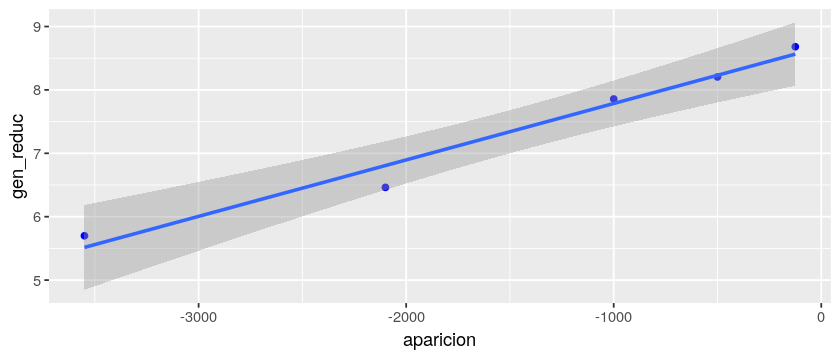

In [40]:
ggplot(data=dflog,aes(x=aparicion,y=gen_reduc))+geom_point(color="blue")+
    geom_smooth(method="lm")

In [41]:
model_reduc


Call:
lm(formula = gen_reduc ~ aparicion, data = dflog)

Coefficients:
(Intercept)    aparicion  
  8.6760863    0.0008902  


In [42]:
?predict

In [45]:
predict(model_reduc,dflog)
dflog

1        2        3        4        5 
8.564808 8.230975 7.785864 6.806619 5.515796

especie,gen_total,gen_reduc,aparicion
<fct>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


In [58]:
aparicion_df<-data.frame(aparicion=seq(-10e3,0,length.out = 11))

In [59]:
aparicion_df$prediccion<-predict(model_reduc,aparicion_df)

In [60]:
aparicion_df

aparicion,prediccion
<dbl>,<dbl>
-10000,-0.2261402
-9000,0.6640824
-8000,1.5543051
-7000,2.4445277
-6000,3.3347504
-5000,4.2249730
-4000,5.1151957
-3000,6.0054183
-2000,6.8956410


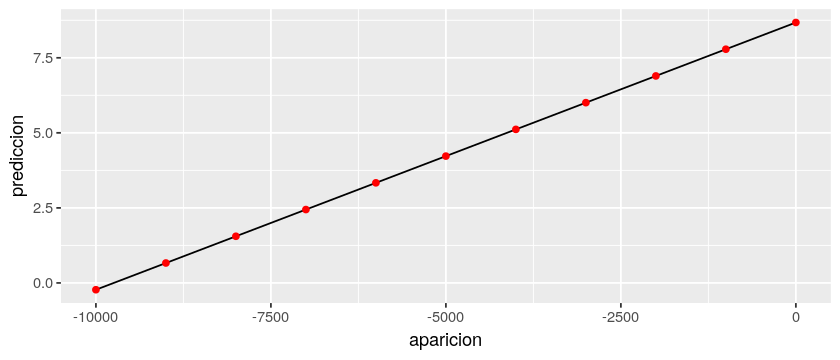

In [62]:
ggplot(data=aparicion_df,aes(x=aparicion,y=prediccion))+geom_line()+geom_point(color="red")

In [63]:
?optim